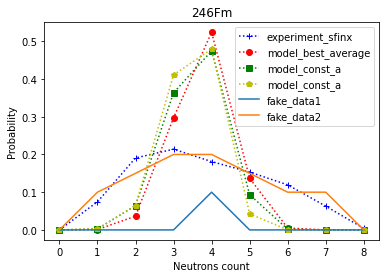

[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
[0, 0, 0, 0, 24, 0, 0, 0, 0]
96.0
KstestResult(statistic=0.4793388429752066, pvalue=3.9359933876048636e-05)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
[0, 0, 9, 72, 126, 33, 1, 0, 0]
909.0
KstestResult(statistic=0.2271184115771064, pvalue=5.298434435974109e-06)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
[0, 1, 15, 88, 114, 22, 0, 0, 0]
861.0
KstestResult(statistic=0.2471763085399449, pvalue=5.754377201405703e-07)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
[0, 1, 16, 99, 115, 10, 0, 0, 0]
840.0
KstestResult(statistic=0.29734919927300163, pvalue=5.274396475130061e-10)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
[0, 24, 36, 48, 48, 36, 24, 24, 0]
924.0
KstestResult(statistic=0.033884297520661154, pvalue=0.9979511546390353)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
[0, 18, 46, 52, 44, 37, 29, 15, 1]
914.0
KstestResult(statistic=0.0, pvalue=1.0)


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
  
x = list(range(0, 9))
experiment_sfinx = np.array([0,
                             0.0744933458,
                             0.1906650315,
                             0.2139786405,
                             0.18113788,
                             0.1532062738,
                             0.1194688463,
                             0.0630159348,
                             0.0040340473])
model_best_average = np.array([0, 
                                 0.000981469247789, 
                                 0.036295527115418, 
                                 0.297116498126063, 
                                 0.523862925878301, 
                                 0.136787200106033, 
                                 0.004955856204289, 
                                 5.23e-07, 
                                 0])
model_const_a = np.array([0, 
                            0.00275513650467692, 
                            0.0642697727768682, 
                            0.363509675971298, 
                            0.474408878006353, 
                            0.093345482522875,
                            0.00170846992062599,
                            2.58429730325327e-06,
                            0])
model_new_shell_corr = np.array([0,
                                   0.00256620189912815,
                                   0.0644684040640992,
                                   0.411013930899054,
                                   0.479079176708237,
                                   0.0427068424548669,
                                   0.000165443816015288,
                                   1.58599463483046e-10,
                                   0])
fake_data1 = np.array([0, 0, 0, 0, 0.1, 0, 0, 0, 0])
fake_data2 = np.array([0, 0.1, 0.15, 0.2, 0.2, 0.15, 0.1, 0.1, 0.0])
    
plt.plot(x,experiment_sfinx,'b+:',label='experiment_sfinx')
plt.plot(x,model_best_average,'ro:',label='model_best_average')
plt.plot(x,model_const_a,'gs:',label='model_const_a')
plt.plot(x,model_new_shell_corr,'yp:',label='model_const_a')
plt.plot(x,fake_data1,label='fake_data1')
plt.plot(x,fake_data2,label='fake_data2')
plt.legend()
plt.title('246Fm')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

def neutron_events_from(probabilities, sf=241):
    counts = list(map(lambda p: round(p*sf), probabilities))
    print(counts)
    r = np.empty(0)
    for k, count in enumerate(counts):
        r = np.append(r, np.full(count, k))
    print(sum(r))
    return r.astype(int)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
models = [fake_data1, model_best_average, model_const_a, model_new_shell_corr, fake_data2, experiment_sfinx]
for model in models:
    print(ks_2samp(neutron_events_from(experiment_sfinx), neutron_events_from(model)))
